In [1]:
import pandas as pd
# from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, precision_score, recall_score
from xgboost import XGBClassifier, XGBRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
import numpy as np
import pickle as pkl

In [20]:
data = pd.read_csv('../data/food_vectors_context_only_mixed_1_full.csv',header=None)

In [21]:
data = data.rename(columns={0:'user',1:'date',102:'goal',103:'actual',104:'label'})

In [22]:
data = data[data['goal'] > 1200]
data = data[data['goal'] < 5000]

In [23]:
data = data[data['actual'] > 1200]
data = data[data['actual'] < 5000]

In [24]:
data = data[data['label'] != 'on_target']

In [25]:
groups = data.groupby('user')
grouped_y = groups['label'].agg(lambda x:x.value_counts().index[0])
grouped_x = groups.mean()
grouped = grouped_x.copy()
grouped['label'] = grouped_y

In [26]:
grouped.iloc[:,0:100].head()

,2,3,4,5,6,7,8,9,10,11,...,92,93,94,95,96,97,98,99,100,101
user,,,,,,,,,,,,,,,,,,,,,
1,0.940640,1.974395,0.516999,7.486841,2.605335,3.387472,3.565053,-0.823774,-1.565085,-10.936691,...,1.752259,-7.354630,-1.592853,1.125635,5.186624,7.063970,4.248565,-3.527355,-6.715618,-0.727340
2,-3.115656,3.035923,2.400324,7.143588,-0.790513,16.942437,3.580500,4.901053,0.373068,-23.879236,...,6.420133,-1.233227,-5.576033,7.955240,2.753351,12.363296,10.928503,-4.214720,-13.942097,8.026571
3,1.195099,1.692657,3.224738,4.544582,-4.186786,9.144178,0.262414,3.690105,4.142238,-14.885282,...,-0.455833,-2.529435,-5.226776,7.008238,0.619791,7.976729,6.426600,0.235738,-9.332515,4.200863
4,-2.437403,8.254900,1.747083,4.392107,2.175820,8.169510,-0.681037,-3.147953,5.117293,-27.392433,...,-4.778841,-10.433803,0.723171,8.277707,4.771753,7.294773,3.695137,-3.313980,-17.453933,7.658113
5,2.532470,10.246103,14.160194,17.413735,-0.970067,0.482242,12.881612,-2.614593,13.848845,-35.409870,...,14.447327,-4.409335,-16.560263,6.139350,13.263314,16.036523,7.948457,0.872352,-9.128687,1.161485


In [27]:
sum(grouped['label'] == 'below')

4175

In [28]:
# y = grouped.loc[:,'label']
# X = grouped.iloc[:,1:101]
y = grouped.iloc[0:20,102]
X = grouped.iloc[0:20,1:101]

In [29]:
scoring = {'accuracy':'accuracy',
           'precision':make_scorer(precision_score,average='macro'),
           'recall':make_scorer(recall_score,average='macro')}

In [30]:
svc = SVC(kernel='linear')
scores = cross_validate(svc,X,y,scoring=scoring,cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
scores

{'fit_time': array([ 0.00200009,  0.00200009,  0.00099993,  0.00300002,  0.00199986]),
 'score_time': array([ 0.00300002,  0.00099993,  0.00300026,  0.00200009,  0.00300026]),
 'test_accuracy': array([ 0.75,  0.75,  0.75,  0.75,  0.75]),
 'test_precision': array([ 0.375,  0.75 ,  0.375,  0.375,  0.375]),
 'test_recall': array([ 0.5       ,  0.83333333,  0.5       ,  0.5       ,  0.5       ]),
 'train_accuracy': array([ 1.,  1.,  1.,  1.,  1.]),
 'train_precision': array([ 1.,  1.,  1.,  1.,  1.]),
 'train_recall': array([ 1.,  1.,  1.,  1.,  1.])}

In [32]:
print(np.mean(scores['test_accuracy']))
print(np.std(scores['test_accuracy']))
print(np.mean(scores['test_precision']))
print(np.std(scores['test_precision']))
print(np.mean(scores['test_recall']))
print(np.std(scores['test_recall']))

0.75
0.0
0.45
0.15
0.566666666667
0.133333333333


In [60]:
# pkl.dump(scores,open('../predictive_models/svm_5_fold_scores.pkl','wb'))

In [62]:
# pkl.dump(svc,open('../predictive_models/svm_model.pkl','wb'))

In [138]:
# xgb = XGBClassifier(max_depth=3,colsample_bytree=0.9,gamma=2,subsample=0.6,learning_rate=0.07,n_estimators=300)
# scores = cross_validate(xgb,X,y,scoring='accuracy')
# np.mean(scores['test_score'])

0.75991692627206653

In [137]:
# kn = KNeighborsClassifier()
# kn.fit(X_train,y_train)
# y_pred = kn.predict(X_test)
# accuracy_score(y_test,y_pred)

0.6875

In [141]:
# xgb = XGBRegressor(max_depth=4,n_estimators=400,colsample_bytree=0.7,learning_rate=0.01)
# xgb.fit(X_train,y_train)
# y_test_pred = xgb.predict(X_test)
# y_train_pred = xgb.predict(X_train)
# r2_score(y_test,y_test_pred)

0.033759517804021089

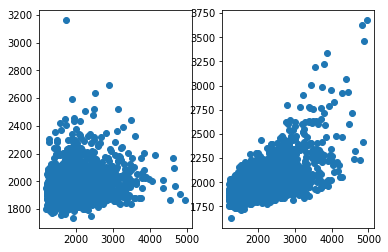

In [142]:
%matplotlib inline
fig, axs = plt.subplots(nrows=1,ncols=2)
axs[0].scatter(x=y_test,y=y_test_pred)
axs[1].scatter(x=y_train,y=y_train_pred)

In [17]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

In [34]:
f_importances(svc.coef_, X.columns[1:101])

AttributeError: 'SVC' object has no attribute 'dual_coef_'

In [35]:
svc.

AttributeError: 'SVC' object has no attribute 'dual_coef_'